<a href="https://colab.research.google.com/github/allisonmorales/Lenguajes/blob/gh-pages/3_3_DiffieHellman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiffieHellman

Revisemos los pasos para generar las claves del algoritmo:


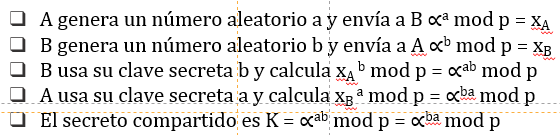

Si revisamos la funcion generate_private_key, los pasos estan implementados en la misma. 

In [ ]:
import random


def generate_private_key(n, g):
    # random number for Alice where x<n-1
    x = random.randint(1, n)
    # random number for Bob where y<n-1
    y = random.randint(1, n)

    # calculate g^x mod n which is Alice's k1
    k1 = pow(g, x, n)
    # calculate g^y mod n which is Bob's k2
    k2 = pow(g, y, n)

    # if an attacker wants to get x and y (the private keys) which is the discrete
    # logarithm problem it is an exponentially slow process !!!
    a_pk = pow(k2, x, n)
    b_pk = pow(k1, y, n)

    return a_pk, b_pk
    # print("Alice's private key %s" % (pow(k2, x, n)))
    # print("Bob's private key %s" % (pow(k1, y, n)))

# it should be a huge prime number
n = 37
# g is the primitive root of n
g = 13

# using Diffie-Hellman cryptosystem for generating private key (for DES and AES)
a, b = generate_private_key(n, g)
print("Alice's private key %s" % a)
print("Bob's private key %s" % b)

Alice's private key 27
Bob's private key 27


In [ ]:
!pip install pycrypto

     |████████████████████████████████| 446 kB 4.2 MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499932 sha256=f911edbe8bca86bbfa61a97564af46c446e28f88a3bcb86bfb26575ebd431f65
  Stored in directory: /root/.cache/pip/wheels/cf/85/ba/bbd7c96add459de7598fb424e5ff2309baf2095c844ac0f191
Successfully built pycrypto


## Usos

Existen diversos metodos para implementar el algoritmo de DIffie Hellman con otros algoritmos como DES o AES. Si recordamos las implementaciones anteriores, la encriptacion y desencriptacion tenian una misma clave para trabajar. Usando el algoritmo, generamos una clave para cada uno de los procesos y las usamos al momento de instanciar un nuevo objeto que realizan los procesos de cifrado y descrifrado.

In [ ]:
import hashlib
from Crypto import Random
from Crypto.Cipher import AES
from base64 import b64encode, b64decode


class AESCipher:
    def __init__(self, key1, key2):
        self.block_size = AES.block_size
        self.a_key = hashlib.sha256(key1.encode()).digest()
        self.b_key = hashlib.sha256(key2.encode()).digest()

    def add_padding(self, plain_text):
        bytes_to_pad = self.block_size - len(plain_text) % self.block_size
        #  PKCS or CMS "Cryptographic Message Syntax"
        ascii_string = chr(bytes_to_pad)
        print(ascii_string)
        padding_string = ascii_string * bytes_to_pad
        return plain_text + padding_string

    def remove_padding(self, txt):
        last_character = txt[len(txt) - 1:]
        return txt[:-ord(last_character)]

    def encrypt(self, plain_text):
        plain_text = self.add_padding(plain_text)
        # IV (Initialization Vector - Seed)
        # even if we use the same key and same plain text
        # the result will be different !!!
        iv = Random.new().read(self.block_size)
        cipher = AES.new(self.a_key, AES.MODE_CBC, iv)
        encrypted_text = cipher.encrypt(plain_text.encode())
        return b64encode(iv+encrypted_text).decode('utf-8')

    def decrypt(self, encrypted_text):
        encrypted_text = b64decode(encrypted_text)
        iv = encrypted_text[:self.block_size]
        cipher = AES.new(self.b_key, AES.MODE_CBC, iv)
        plain_text = cipher.decrypt(encrypted_text[self.block_size:]).decode('utf-8')
        return self.remove_padding(plain_text)

a, b = generate_private_key(n, g)
aes = AESCipher(str(a), str(b))
# print(aes.block_size)
# print(aes.key)
message = 'Este es un mensaje secreto de Xavier Merino'

encrypted = aes.encrypt(message)
print(encrypted)
print(aes.decrypt(encrypted))



l7EzIunxs/vWmpPOAvsjVec4EfnEH63a8FJpuKx1Rvxt/t5Li1EtQwkAAGnj/Ad9Rle0MM65xu9Oq+lYzb0Gsw==
Este es un mensaje secreto de Xavier Merino
